## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [0]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.regularizers import l2

def build_mlp(input_dim, output_dim = 10, ratio = 0, dropout = False, batch = False, hidden_layers = [512, 512, 256, 256, 128, 128, 64]):
  input_layer = Input(input_dim)
  for i, num in enumerate(hidden_layers):
    if i == 0:
      x = Dense(num, activation = 'relu', kernel_regularizer = l2(ratio * 0.001))(input_layer)
      if dropout:
        x = Dropout(0.5)(x)
      if batch:
        x = BatchNormalization()(x)
    else:
      x = Dense(num, activation = 'relu', kernel_regularizer = l2(ratio * 0.001))(x)
      if dropout:
        x = Dropout(0.5)(x)
      if batch:
        x = BatchNormalization()(x)
  out = Dense(output_dim, activation = 'softmax')(x)
  model = Model(input_layer, [out])
  return model

In [0]:
"""Code Here
設定超參數
"""
switch = [[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1]]

In [0]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for s in switch:
  keras.backend.clear_session()

  name = 'reg:%d, drop:%d, batch:%d'%(s[0], s[1], s[2])
  print(name)
  model = build_mlp(input_dim = x_train.shape[1:], ratio = s[0], dropout = s[1], batch = s[2])

  model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam') 

  model.summary()

  model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 25, batch_size = 128, shuffle=True)

  acc = model.history.history['acc']
  val_acc = model.history.history['val_acc']
  loss = model.history.history['loss']
  val_loss = model.history.history['val_loss']

  
  results[name] = {
      'acc':acc,
      'val_acc':val_acc,
      'loss':loss,
      'val_loss':val_loss
  }

reg:0, drop:0, batch:0
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 

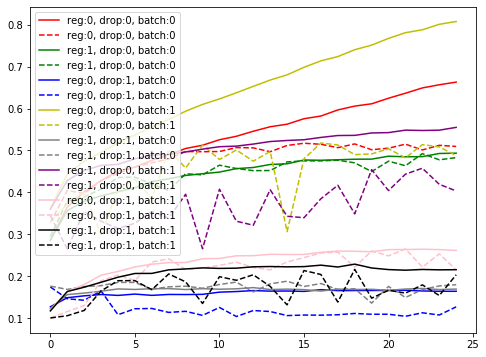

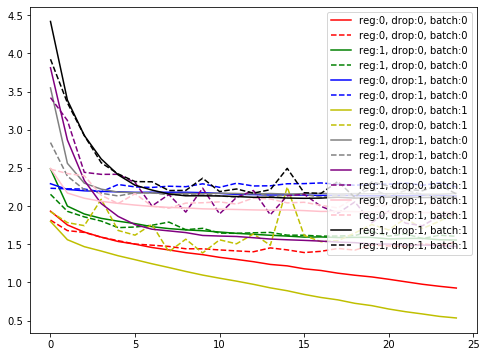

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
colors = ['r', 'g', 'b', 'y', 'gray', 'purple', 'pink', 'black']

plt.figure(figsize = (8, 6))
for i, key in enumerate(results.keys()):
  plt.plot(range(len((results[key]['acc']))), results[key]['acc'], '-', color = colors[i], label = key)
  plt.plot(range(len(results[key]['val_acc'])), results[key]['val_acc'], '--', color = colors[i], label = key)
plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, key in enumerate(results.keys()):
  plt.plot(range(len(results[key]['loss'])), results[key]['loss'], '-', color = colors[i], label = key)
  plt.plot(range(len(results[key]['val_loss'])), results[key]['val_loss'], '--', color = colors[i], label = key)
plt.legend()
plt.show()